In [1]:
import pandas as pd
import math
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString, MultiPolygon
import descartes
import numpy as np
from pyproj import Proj, transform
%matplotlib inline

In [2]:
## Cambio de coordenadas
## Res: Archivo localidades_pol.shp (Polígonos)
arch = 'conjunto_de_datos/00l.shp'
locs = gpd.read_file(arch)

In [3]:
proj = '+proj=lcc +lat_1=17.5 +lat_2=29.5 +lat_0=12 +lon_0=-102 +x_0=2500000 +y_0=0 +a=6378137 +b=6378136.027241431 +units=m +no_defs'
myProj = Proj(proj)
geometry = locs['geometry']
for idx, localidad in locs.iterrows():
    try:
        proy = [myProj(i[0],i[1],inverse=True) for i in localidad['geometry'].exterior.coords]
        geometry[idx] = Polygon(proy)
    except:
        proy = [[myProj(i[0],i[1],inverse=True) for i in j.exterior.coords] for j in localidad['geometry']]
        polygons = [Polygon(i) for i in proy]
        geometry[idx] = MultiPolygon(polygons)
locs['geometry'] = geometry

In [4]:
locs.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,NOMGEO,AMBITO,geometry
0,010010125,01,001,0125,Cañada Grande de Cotorina,Rural,"POLYGON ((-102.23555 21.72999, -102.23561 21.7..."
1,010010126,01,001,0126,Cañada Honda [Estación],Rural,"POLYGON ((-102.19595 21.94858, -102.19592 21.9..."
2,010010128,01,001,0128,El Cariñán,Rural,"POLYGON ((-102.37159 21.83572, -102.37122 21.8..."
3,010010141,01,001,0141,Cobos,Rural,"POLYGON ((-102.23168 21.77053, -102.23187 21.7..."
4,010010146,01,001,0146,El Conejal,Rural,"POLYGON ((-102.20672 21.86153, -102.20692 21.8..."


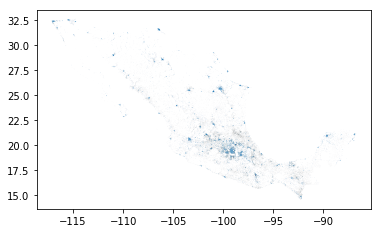

In [5]:
locs.to_file('conjunto_de_datos/Localidades/localidades_pol.shp')
locs.shape
locs.plot()

In [6]:
## Cambio de coordenadas
## Res: Archivo localidades.shp
arch = 'conjunto_de_datos/00lpr.shp'
locs_pr = gpd.read_file(arch)

In [7]:
geometry = locs_pr['geometry']
for idx, est in locs_pr.iterrows():
    proy = myProj(est['geometry'].x,est['geometry'].y,inverse=True)
    geometry[idx] = Point(proy)
#locs_pr['geometry'] = geometry

In [8]:
geometry[0:10]
locs_pr['geometry'] = geometry
locs_pr.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,NOMGEO,PLANO,geometry
0,0100100941068800,01,001,0094,1068,800,Granja Adelita,No,POINT (-102.37355 21.81377)
1,0100100961759800,01,001,0096,1759,800,Agua Azul,Croquis,POINT (-102.35714 21.82559)
2,0100101001759800,01,001,0100,1759,800,Rancho Alegre,No,POINT (-102.37277 21.79659)
3,0100101021123800,01,001,0102,1123,800,Los Arbolitos [Rancho],No,POINT (-102.35732 21.72257)
4,0100101041903800,01,001,0104,1903,800,Ardillas de Abajo (Las Ardillas),Croquis,POINT (-102.19193 21.88658)


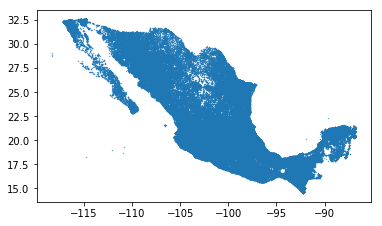

In [9]:
locs_pr.shape
locs_pr.plot(markersize = 0.1)

In [10]:
locs_pr.to_file('conjunto_de_datos/Localidades/localidades.shp')

In [11]:
locs_pr['Clave'] = locs_pr['CVE_ENT'] + locs_pr['CVE_MUN'] + locs_pr['CVE_LOC']
locs_pr.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,NOMGEO,PLANO,geometry,Clave
0,0100100941068800,01,001,0094,1068,800,Granja Adelita,No,POINT (-102.37355 21.81377),010010094
1,0100100961759800,01,001,0096,1759,800,Agua Azul,Croquis,POINT (-102.35714 21.82559),010010096
2,0100101001759800,01,001,0100,1759,800,Rancho Alegre,No,POINT (-102.37277 21.79659),010010100
3,0100101021123800,01,001,0102,1123,800,Los Arbolitos [Rancho],No,POINT (-102.35732 21.72257),010010102
4,0100101041903800,01,001,0104,1903,800,Ardillas de Abajo (Las Ardillas),Croquis,POINT (-102.19193 21.88658),010010104


In [16]:
## Cambio de coordenadas
## Res: Archivo localidades_pol
arch = 'conjunto_de_datos/Localidades/loc2010gw.shp'
loc_2010 = gpd.read_file(arch)

In [17]:
loc_2010['Clave'] = loc_2010['CVE_EDO'] + loc_2010['CVE_MUN'] + loc_2010['CVE_LOC']
loc_2010.head()
#loc_2010[['geometry','Clave']]

,NOM_ENT,NOM_MUN,NOM_LOC,ALTITUD,POBTOT,lon_dd,lat_dd,CVE_EDO,CVE_MUN,CVE_LOC,COV_,COV_ID,geometry,Clave
0,Zacatecas,Apozol,APOZOL,1274,2626,-103.090833,21.470278,32,001,0001,2.0,1.0,POINT (-103.09083 21.47028),320010001
1,Zacatecas,Apozol,ACHOQUEN,1300,37,-103.072500,21.514444,32,001,0002,3.0,2.0,POINT (-103.07250 21.51444),320010002
2,Zacatecas,Apozol,LAS ANONAS,1460,2,-103.139722,21.506389,32,001,0003,4.0,3.0,POINT (-103.13972 21.50639),320010003
3,Zacatecas,Apozol,RANCHO DE AYO,1482,24,-103.039722,21.454444,32,001,0006,5.0,4.0,POINT (-103.03972 21.45444),320010006
4,Zacatecas,Apozol,BANCO DE PIEDRA,1738,14,-103.165833,21.510556,32,001,0007,6.0,5.0,POINT (-103.16583 21.51056),320010007


In [18]:
#loc_2010[loc_2010['CVE_LOC']=="0114"]
loc_2010.shape

(192245, 14)

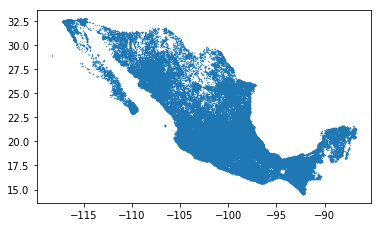

In [19]:
loc_2010.plot(markersize = 0.1)

In [20]:
excel = pd.read_excel('PROMTEL Estudio de Cobertura (2).xlsx','Análisis de población')
excel.head()

,ID,ID ENTIDAD,ENTIDAD,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,longitud,latitud,altitud,Población,Clasificación,Rango,HAB_CUB_OPERADORES,HAB_SCOB_OPERADORES,% COB OPERADORES,COB OPERADORES
0,10010001,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1021746,215251,1885,722250,Localidad Mayor,a) > 10 mil,722250,0,1.0,SI
1,10010094,1,Aguascalientes,1,Aguascalientes,94,Granja Adelita,1022225,215219,1903,14,Localidad Menor,g)<500,14,0,1.0,SI
2,10010096,1,Aguascalientes,1,Aguascalientes,96,Agua Azul,1022127,215303,1863,37,Localidad Menor,g)<500,37,0,1.0,SI
3,10010100,1,Aguascalientes,1,Aguascalientes,100,Rancho Alegre,1022222,215116,1880,10,Localidad Menor,g)<500,10,0,1.0,SI
4,10010102,1,Aguascalientes,1,Aguascalientes,102,Los Arbolitos [Rancho],1022126,214649,1860,7,Localidad Menor,g)<500,7,0,1.0,SI


In [21]:
excel['Clave'] = [str(elem) for elem in excel['ID']]
excel['Clave'] = ['0' + elem if len(elem)==8 else elem for elem in excel['Clave']]
excel.head()

,ID,ID ENTIDAD,ENTIDAD,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,longitud,latitud,altitud,Población,Clasificación,Rango,HAB_CUB_OPERADORES,HAB_SCOB_OPERADORES,% COB OPERADORES,COB OPERADORES,Clave
0,10010001,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1021746,215251,1885,722250,Localidad Mayor,a) > 10 mil,722250,0,1.0,SI,010010001
1,10010094,1,Aguascalientes,1,Aguascalientes,94,Granja Adelita,1022225,215219,1903,14,Localidad Menor,g)<500,14,0,1.0,SI,010010094
2,10010096,1,Aguascalientes,1,Aguascalientes,96,Agua Azul,1022127,215303,1863,37,Localidad Menor,g)<500,37,0,1.0,SI,010010096
3,10010100,1,Aguascalientes,1,Aguascalientes,100,Rancho Alegre,1022222,215116,1880,10,Localidad Menor,g)<500,10,0,1.0,SI,010010100
4,10010102,1,Aguascalientes,1,Aguascalientes,102,Los Arbolitos [Rancho],1022126,214649,1860,7,Localidad Menor,g)<500,7,0,1.0,SI,010010102


In [142]:
#excel1 = pd.merge(excel,locs_pr[['geometry','Clave']],how='left', on='Clave')
excel1 = pd.merge(excel,loc_2010[['geometry','Clave']],how='left', on='Clave')

In [177]:
geometry = excel1['geometry']
for idx,row in excel1.iterrows():
    if pd.isna(row['geometry']):
        #print(idx)
        #print(row['Clave'])
        geometry[idx] = locs_pr[locs_pr['Clave'] == row['Clave']].iloc[0]['geometry']
excel1['geometry'] = geometry

In [178]:
gdf = gpd.GeoDataFrame(excel1,geometry = excel1['geometry'])

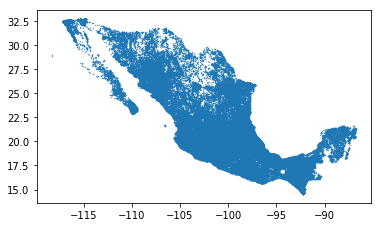

In [179]:
gdf.plot(markersize = 0.1)